In [3]:
import numpy as np
import matplotlib.pyplot as plt

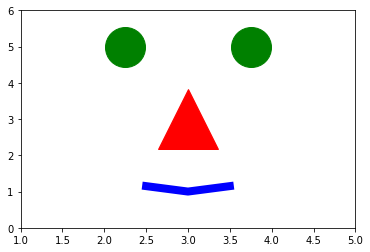

In [4]:
plt.plot([2.25,3.75], [5,5], 'go', markersize=40)
plt.plot([3], [3], 'r^', markersize=60)
plt.plot([2.5,3,3.5], [1.15,1,1.15], 'b', linewidth=8)
plt.axis((1,5,0,6))
plt.show()

In [6]:
gozler = [2.25,3.75,5,5,4] # 40 yerine 4 yazdim, butun degerler 1-10 arasinda olsun
burun = [3,3,6]# ayni nedenle 60 yerine 6 yazdim,
agiz = [2.5,3,3.5, 1.15,1,1.15,8]
adam = np.array(gozler + burun + agiz)
adam

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

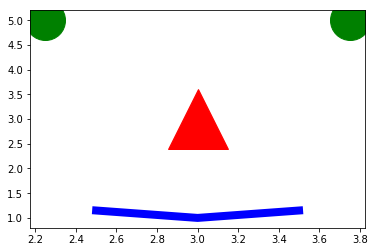

In [7]:
def adam_ciz(adam):
    plt.plot([adam[0],adam[1]], [adam[2],adam[3]], 'go', markersize=adam[4]*10)
    plt.plot(adam[5], adam[6], 'r^', markersize=adam[7]*10)
    plt.plot([adam[8],adam[9],adam[10]], [adam[11],adam[12],adam[13]], 'b', linewidth=adam[14])
    plt.show()
adam_ciz(adam)

In [8]:
v = np.random.rand(15) * 10
v

array([5.71064261, 2.91922727, 1.47533927, 2.28834661, 2.76363753,
       8.81994296, 7.53878633, 9.50489703, 7.841813  , 8.75412885,
       8.53061476, 7.01013576, 8.5101222 , 1.05574248, 0.03607637])

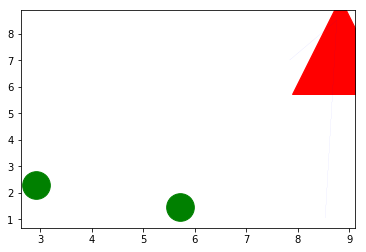

In [9]:
adam_ciz(v)

In [10]:
def kisi2():
    # rastegele 15 elemanli, degerler 1-10 arasinda olan, bir vektor yazalim
    return np.random.rand(15) * 10 

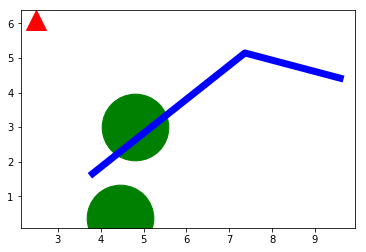

In [12]:
adam_ciz(kisi2())

In [13]:
def uyum2(birey):
    return 1/ (1 + sum((adam - birey)**2))

def mutasyon2(kisi, p):
    """ p olasilikla kisinin bir ozelligine 0-10 arasinda rastgele
    deger atanir."""
    if np.random.rand() < p:
        m = np.random.choice(len(kisi))
        kisi[m] = np.random.rand() * 10
        
def en_iyi(toplum, olasiliklar):
    eniyi = olasiliklar.argsort()[-1]
    return toplum[eniyi]


def olasilik(toplum, uyum = uyum2, elitist = True):
    """her bireyin uyum degeri hesaplanip, olasilik degerine dondurulur.
    (uyumlar) [0.2, 0.2, 0.4, 0.4, 0.8] >> (olasiliklar) [0.1, 0.1, 0.2, 0.2, 0.4]
    
    if elitist == True
        [0.2, 0.2, 0.4, 0.4, 0.8] >>[ 0.10225857,  0.10225857,  0.16859588,  0.16859588,  0.45829111]
    """
    uyumlar = np.array([uyum(toplum[i])  for i in range(len(toplum))])
    if elitist:
        uyumlar = np.exp(uyumlar / uyumlar.mean()) # ortalamadan kucuk degerler iyice kuculur
    olasiliklar = uyumlar / uyumlar.sum()
    return olasiliklar


def secim(olasiliklar):
    """p=olasiliklara gore bireyler secilir. Olasiligi yuksek olan daha fazla secilir."""
    secim = np.random.choice(len(olasiliklar), 2, replace= False, p=olasiliklar)
    return secim

def caprazlama(toplum, secim):
    """Basarili 2 birey kisi0 ve kisi1 secilip caprazlanir."""
    kisi0 = toplum[secim[0]]
    kisi1 = toplum[secim[1]]
    n = len(toplum[secim[0]])//2
    return np.hstack((kisi0[:n],kisi1[n:]))

def yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p = 0.05):
    """ Toplumun (basarisiz) yarisi emekli edilip,
    basarili bireylerin cocuklari topluma eklenecek.
    """
    k = len(toplum)//2
    emekli = olasiliklar.argsort()[:k] # basarisizlar
    #yeniler = np.zeros((k,toplum.shape[1]))
    for i in range(k):
        s = secim(olasiliklar)
        yeni_kisi = caprazlama(toplum, s)
        mutasyon(yeni_kisi, p) 
        #yeniler[i] = yeni_kisi
        toplum[emekli[i]]= yeni_kisi
        
    #toplum[emekli] = yeniler
    return toplum

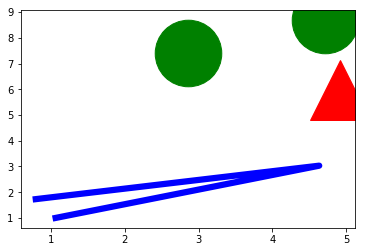

In [14]:
N = 100 # Toplumdaki kisi sayisi N
toplum = np.array([kisi2()  for i in range(N)])
olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

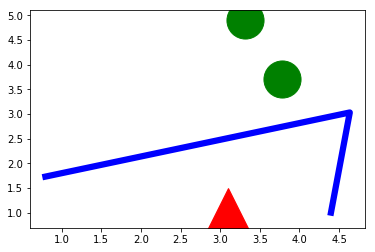

In [15]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

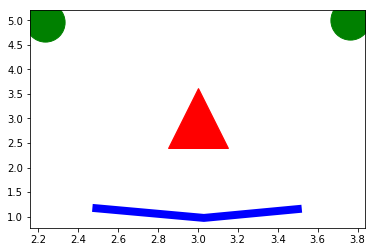

In [17]:
for i in range(500):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))